In [1]:
import json
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

import torch
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

from Utilities import score
from Utilities import plot_matrix_runs, plot_results
from Utilities import Add_ID_Count_Neighbours, PairData, prepare_dataloader_distance_scale

from training import training_loop

from models import GCN_pairs_distance

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
dataset = TUDataset(root='/tmp/MUTAG_transformed', name='MUTAG', pre_transform=Add_ID_Count_Neighbours()) 

### Results with different choices for L1 distance.
Here we use:
- L1 distance with absolute homomorphism counts
- L1 distance with homomorphism count densities
- L1 distance with rescaled homomorphism count density (maybe).

In [7]:
train_loader, val_loader, test_loader = prepare_dataloader_distance_scale('data/homomorphism_counts/MUTAG_full_kernel_max_20_run1.homson', dataset, batch_size=32, dist='L1', device = device, scaling = 'counts')

In [8]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_L1_Counts', dist = 'L1').to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss().to(device)

In [9]:
train_losses, validation_losses = training_loop(model, train_loader, optimizer, criterion, val_loader, epoch_number=100, return_losses=True)

Epoch: 10 | Time for 10 epochs: 0m 25s
	Train Loss: 448281244508242.750
	 Val. Loss: 370380646455109.812
Epoch: 20 | Time for 10 epochs: 0m 31s
	Train Loss: 446043164656443.500
	 Val. Loss: 377394192306548.375
Epoch: 30 | Time for 10 epochs: 0m 30s
	Train Loss: 374054764060754.750
	 Val. Loss: 447022349752133.812
Epoch: 40 | Time for 10 epochs: 0m 39s
	Train Loss: 192781317890958.219
	 Val. Loss: 570467361774871.250
Epoch: 50 | Time for 10 epochs: 0m 38s
	Train Loss: 147277748011339.000
	 Val. Loss: 690369782278330.125
Epoch: 60 | Time for 10 epochs: 0m 32s
	Train Loss: 141131373410366.062
	 Val. Loss: 624391184068235.625
Epoch: 70 | Time for 10 epochs: 0m 36s
	Train Loss: 127830129803594.984
	 Val. Loss: 628348447358976.000
Epoch: 80 | Time for 10 epochs: 0m 30s
	Train Loss: 112912745325785.219
	 Val. Loss: 616584621922117.875
Epoch: 90 | Time for 10 epochs: 0m 25s
	Train Loss: 96433018916243.391
	 Val. Loss: 737891274051956.375
Epoch: 100 | Time for 10 epochs: 0m 35s
	Train Loss: 881

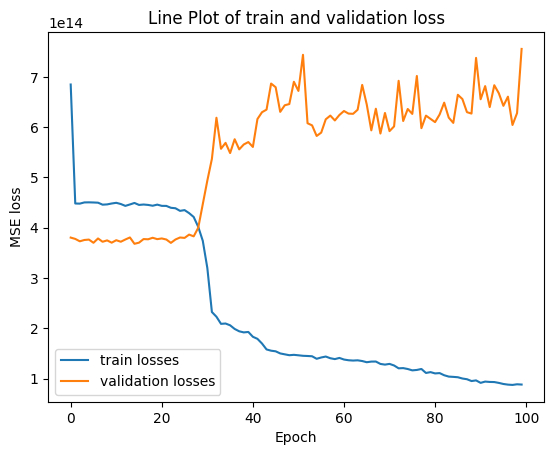

In [10]:
plt.plot(train_losses, label = 'train losses')
plt.plot(validation_losses, label = 'validation losses')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.title('Line Plot of train and validation loss')
plt.legend()
plt.show()

MSE Loss: 379847478083584.0


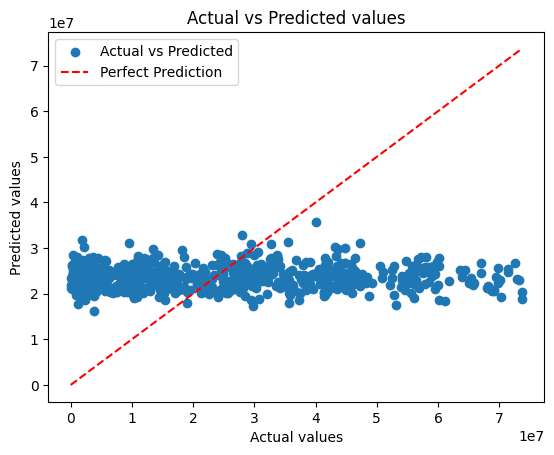

In [13]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_L1_Counts', dist = 'L1').to(device)
model.load_state_dict(torch.load("models/GCN_L1_Counts.pt"))
y, predictions = score(model, test_loader)
plot_results(y, predictions)

In [14]:
train_loader, val_loader, test_loader = prepare_dataloader_distance_scale('data/homomorphism_counts/MUTAG_full_kernel_max_20_run1.homson', dataset, batch_size=32, dist='L1', device = device, scaling = 'counts_density')

In [15]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_L1_Counts_Density', dist = 'L1').to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss().to(device)

In [16]:
train_losses, validation_losses = training_loop(model, train_loader, optimizer, criterion, val_loader, epoch_number=100, return_losses=True)

Epoch: 10 | Time for 10 epochs: 0m 30s
	Train Loss: 0.001
	 Val. Loss: 0.002
Epoch: 20 | Time for 10 epochs: 0m 24s
	Train Loss: 0.002
	 Val. Loss: 0.001
Epoch: 30 | Time for 10 epochs: 0m 37s
	Train Loss: 0.002
	 Val. Loss: 0.001
Epoch: 40 | Time for 10 epochs: 0m 37s
	Train Loss: 0.001
	 Val. Loss: 0.001
Epoch: 50 | Time for 10 epochs: 0m 29s
	Train Loss: 0.001
	 Val. Loss: 0.001
Epoch: 60 | Time for 10 epochs: 0m 31s
	Train Loss: 0.001
	 Val. Loss: 0.001
Epoch: 70 | Time for 10 epochs: 0m 28s
	Train Loss: 0.001
	 Val. Loss: 0.001
Epoch: 80 | Time for 10 epochs: 0m 29s
	Train Loss: 0.001
	 Val. Loss: 0.001
Epoch: 90 | Time for 10 epochs: 0m 30s
	Train Loss: 0.002
	 Val. Loss: 0.001
Epoch: 100 | Time for 10 epochs: 0m 28s
	Train Loss: 0.001
	 Val. Loss: 0.001


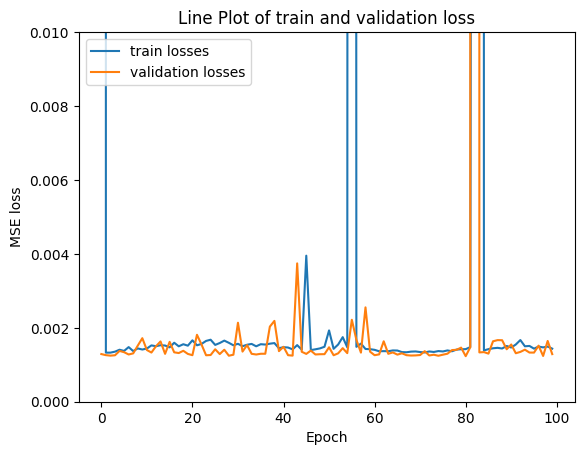

In [20]:
plt.plot(train_losses, label = 'train losses')
plt.plot(validation_losses, label = 'validation losses')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.ylim(0, 0.01)
plt.title('Line Plot of train and validation loss')
plt.legend()
plt.show()

MSE Loss: 0.0017899095546454191


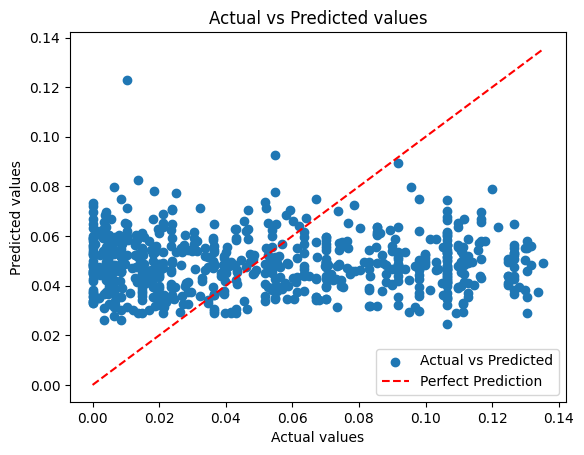

In [17]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_L1_Counts_Density', dist = 'L1').to(device)
model.load_state_dict(torch.load("models/GCN_L1_Counts_Density.pt"))
y, predictions = score(model, test_loader)
plot_results(y, predictions)

In [28]:
train_loader, val_loader, test_loader = prepare_dataloader_distance_scale('data/homomorphism_counts/MUTAG_full_kernel_max_20_run1.homson', dataset, batch_size=32, dist='L1', device = device, scaling = 'counts_density_scaled')

ValueError: Invalid value for scaling. Expected counts, counts_density or count_density_rescaled

In [ ]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_L1_Counts_Density_Rescaled', dist = 'L1').to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss().to(device)

In [ ]:
training_loop(model, train_loader, optimizer, criterion, val_loader, epoch_number=100)

Epoch: 10 | Time for 10 epochs: 0m 26s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 20 | Time for 10 epochs: 0m 23s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 30 | Time for 10 epochs: 0m 26s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 40 | Time for 10 epochs: 0m 32s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 50 | Time for 10 epochs: 1m 0s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 60 | Time for 10 epochs: 0m 46s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 70 | Time for 10 epochs: 0m 42s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 80 | Time for 10 epochs: 0m 35s
	Train Loss: 12.976
	 Val. Loss: 0.007
Epoch: 90 | Time for 10 epochs: 0m 23s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 100 | Time for 10 epochs: 0m 22s
	Train Loss: 0.000
	 Val. Loss: 0.000


MSE Loss: 0.0022658617235720158


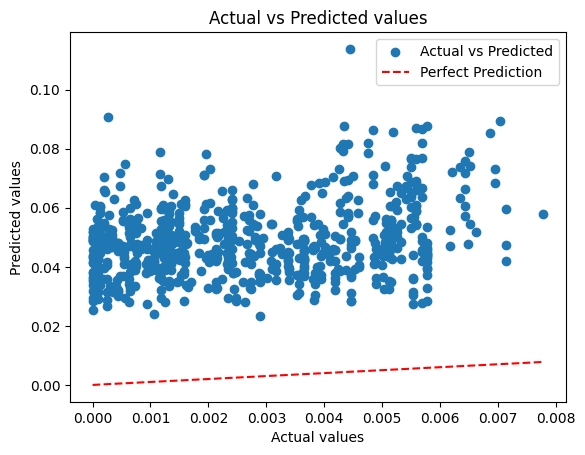

In [24]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_L1_Counts_Density', dist = 'L1').to(device)
model.load_state_dict(torch.load("models/GCN_L1_Counts_Density.pt"))
y, predictions = score(model, val_loader)
plot_results(y, predictions)